In [295]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Blocks data - EDA

In [519]:
df0 = pd.read_csv('eth_blocks.csv')
df0.head()

,timestamp,number,hash,parent_hash,nonce,sha3_uncles,logs_bloom,transactions_root,state_root,receipts_root,miner,difficulty,total_difficulty,size,extra_data,gas_limit,gas_used,transaction_count,base_fee_per_gas
0,2021-08-22 00:23:34+00:00,13071857,0x1959c77933c5ea726e8150dd6c46bb4d1c3f2ab65c9b...,0x1290601507c95d583ccb9951cc36e21db7de9c974b67...,0x08c92803f8a02390,0x1dcc4de8dec75d7aab85b567b6ccd41ad312451b948a...,0xd1b9bdb7e1be3aeb9aad9d5feb789afd7a749cf7bd9a...,0x0127e8cd9dd346f600df7a704b826478977deed11f6e...,0x71e9b09a0085832884a4e54b6e0032a3f1b0431b2855...,0xfcdda7ec006dac4b1b25791747508dba4859f98da366...,0x54e23bcc99e5a5818b382ac5bddda496e199aa6b,8201326215003715,29322554754966640405066,121085,0x20,29941410,29932189,269,2.290552e+10
1,2021-08-22 14:02:54+00:00,13075555,0x8c0ad10013bdc8475d98a2652dffe5dd2166d73d4c96...,0x22fbc497187c2bc71892819daf6e6c41ceab5ab62719...,0x01fb28086b26b57b,0x1dcc4de8dec75d7aab85b567b6ccd41ad312451b948a...,0x51a366fb7b1bbfd7dfd72ae7e1394b15361a306d7339...,0x462e39ccd595b116374ac159465886f454a9176952e8...,0x21fa0a5e7eced20042e20b37a68797fabf35d89d7ccc...,0x67cf4e696c5e682fddd2194b9983edbdf1bb7f2e2f72...,0x54e23bcc99e5a5818b382ac5bddda496e199aa6b,8205530929493774,29352325330915075982650,113472,0x20,30029208,22871216,307,4.365599e+10
2,2021-08-22 04:55:04+00:00,13073088,0xccae13bfbd87a706f0d70cf278e3101e0b4972d814d9...,0x4b67446b82fa436f72e000e378892cd6ef1ebf72accc...,0x05fe0802d72d3517,0x1dcc4de8dec75d7aab85b567b6ccd41ad312451b948a...,0x1ff7d902d12776f196efa6e1d233be853dfa50d70bf9...,0x3770698a25e5631b0112b66e7d16650e3bf215442bf5...,0x074d6f2f9b89c5df7bce9d4cc2bb7e087aa84f478b24...,0xc89c9e00c2f86bc187ca63cdfb4494562e3e78e3838e...,0x54e23bcc99e5a5818b382ac5bddda496e199aa6b,8125513716718054,29332554950124882998729,110035,0x20,30034152,30033910,423,1.652552e+10
3,2021-08-22 23:27:24+00:00,13078105,0xc75d4d5d8d212de3309d672d7e7386686ce174c07452...,0x8e090212824813725eaac45f6cb986cdaa1260cbe433...,0xabead9c9dff61e9c,0x1dcc4de8dec75d7aab85b567b6ccd41ad312451b948a...,0x8530658f67a90c83d5bfa3c8cd3776699122102da311...,0xf2ba673b806cc5d862ad91ce7a90d5f4556593423231...,0xc42190156d674318aa6e930178321a3f0b7a8936b0b7...,0x5332e7f960eeb6ab69712537809d6be85bd62ec83cd0...,0xe9b54a47e3f401d37798fc4e22f14b78475c2afc,8230100106433344,29373023438071345937896,120750,0x3636,30122367,18869260,251,5.588001e+10
4,2021-08-22 08:16:08+00:00,13073956,0xf2fa6d5115798ed8f45ce6961e0e238c7c4258b54aff...,0x3ffa3784b1ea52176d4b6583b5b170d152cb8088f6a3...,0xe5685f51a73d68fd,0x1dcc4de8dec75d7aab85b567b6ccd41ad312451b948a...,0xdc6575eee5f27bf196ceadf686aede197f12fe79e3b5...,0x4fbfe76fd438e2f86bbccabd2413e78bf29c1b331f0e...,0xc7f3f1be735f9d4ff410dc418cbc3c80b3342bca807b...,0x1d3fb778bd29a45d0bc46ae67d3252d9ed708640c300...,0xe9b54a47e3f401d37798fc4e22f14b78475c2afc,7898356713780692,29339550290282855052583,135481,0x3636,30058475,30048024,443,3.319848e+10


In [520]:
df0.shape

(200087, 19)

### Our dataset has more than 200000 (2 x 10^5) samples with 19 attributes

In [521]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200087 entries, 0 to 200086
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   timestamp          200087 non-null  object 
 1   number             200087 non-null  int64  
 2   hash               200087 non-null  object 
 3   parent_hash        200087 non-null  object 
 4   nonce              200087 non-null  object 
 5   sha3_uncles        200087 non-null  object 
 6   logs_bloom         200087 non-null  object 
 7   transactions_root  200087 non-null  object 
 8   state_root         200087 non-null  object 
 9   receipts_root      200087 non-null  object 
 10  miner              200087 non-null  object 
 11  difficulty         200087 non-null  int64  
 12  total_difficulty   200087 non-null  object 
 13  size               200087 non-null  int64  
 14  extra_data         200087 non-null  object 
 15  gas_limit          200087 non-null  int64  
 16  ga

### base_fee_per_gas is null for some samples, we remove these from the dataset. This leaves us with about 170000 (1.7 x 10^5) samples

In [522]:
df0.dropna(inplace=True)
len(df0)

171427

In [523]:
df0.describe()

,number,difficulty,size,gas_limit,gas_used,transaction_count,base_fee_per_gas
count,1.714270e+05,1.714270e+05,171427.000000,1.714270e+05,1.714270e+05,171427.000000,1.714270e+05
mean,1.305071e+07,7.925640e+15,76941.312751,2.999556e+07,1.545639e+07,185.028607,5.961354e+10
std,4.948686e+04,3.074515e+14,56957.979722,2.046306e+05,1.050147e+07,138.947234,7.748271e+10
min,1.296500e+07,7.213602e+15,527.000000,2.744222e+07,0.000000e+00,0.000000,1.000000e+09
25%,1.300786e+07,7.673155e+15,27742.000000,3.000000e+07,5.866318e+06,71.000000,3.407347e+10
50%,1.305071e+07,7.915122e+15,66227.000000,3.000000e+07,1.374067e+07,160.000000,4.624005e+10
75%,1.309357e+07,8.175696e+15,120249.000000,3.002930e+07,2.725976e+07,281.000000,6.717335e+10
max,1.313643e+07,8.713208e+15,512446.000000,3.038299e+07,3.029293e+07,1431.000000,2.889181e+12


<AxesSubplot:>

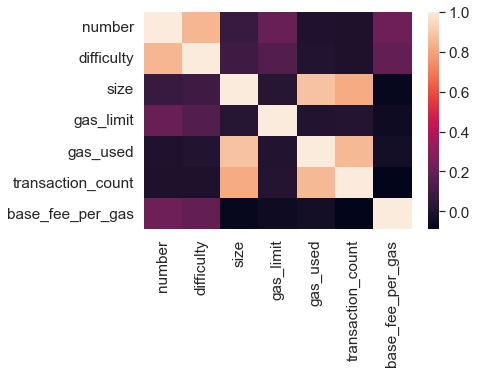

In [524]:
corr = df0.corr()
sns.heatmap(corr)

In [525]:
upper_tri = corr.where(np.triu(np.ones(corr.shape),k=1).astype(bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.8)]
to_drop

['difficulty', 'gas_used', 'transaction_count']

In [526]:
upper_tri = corr.where(np.triu(np.ones(corr.shape),k=1).astype(bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.9)]
to_drop

[]

In [317]:
dfc = df0.copy()
dfc['date'] = pd.to_datetime(df0['timestamp']).dt.day
dfc.head()

,timestamp,number,hash,parent_hash,nonce,sha3_uncles,logs_bloom,transactions_root,state_root,receipts_root,miner,difficulty,total_difficulty,size,extra_data,gas_limit,gas_used,transaction_count,base_fee_per_gas,date
0,2021-08-22 00:23:34+00:00,13071857,0x1959c77933c5ea726e8150dd6c46bb4d1c3f2ab65c9b...,0x1290601507c95d583ccb9951cc36e21db7de9c974b67...,0x08c92803f8a02390,0x1dcc4de8dec75d7aab85b567b6ccd41ad312451b948a...,0xd1b9bdb7e1be3aeb9aad9d5feb789afd7a749cf7bd9a...,0x0127e8cd9dd346f600df7a704b826478977deed11f6e...,0x71e9b09a0085832884a4e54b6e0032a3f1b0431b2855...,0xfcdda7ec006dac4b1b25791747508dba4859f98da366...,0x54e23bcc99e5a5818b382ac5bddda496e199aa6b,8201326215003715,29322554754966640405066,121085,0x20,29941410,29932189,269,2.290552e+10,22
1,2021-08-22 14:02:54+00:00,13075555,0x8c0ad10013bdc8475d98a2652dffe5dd2166d73d4c96...,0x22fbc497187c2bc71892819daf6e6c41ceab5ab62719...,0x01fb28086b26b57b,0x1dcc4de8dec75d7aab85b567b6ccd41ad312451b948a...,0x51a366fb7b1bbfd7dfd72ae7e1394b15361a306d7339...,0x462e39ccd595b116374ac159465886f454a9176952e8...,0x21fa0a5e7eced20042e20b37a68797fabf35d89d7ccc...,0x67cf4e696c5e682fddd2194b9983edbdf1bb7f2e2f72...,0x54e23bcc99e5a5818b382ac5bddda496e199aa6b,8205530929493774,29352325330915075982650,113472,0x20,30029208,22871216,307,4.365599e+10,22
2,2021-08-22 04:55:04+00:00,13073088,0xccae13bfbd87a706f0d70cf278e3101e0b4972d814d9...,0x4b67446b82fa436f72e000e378892cd6ef1ebf72accc...,0x05fe0802d72d3517,0x1dcc4de8dec75d7aab85b567b6ccd41ad312451b948a...,0x1ff7d902d12776f196efa6e1d233be853dfa50d70bf9...,0x3770698a25e5631b0112b66e7d16650e3bf215442bf5...,0x074d6f2f9b89c5df7bce9d4cc2bb7e087aa84f478b24...,0xc89c9e00c2f86bc187ca63cdfb4494562e3e78e3838e...,0x54e23bcc99e5a5818b382ac5bddda496e199aa6b,8125513716718054,29332554950124882998729,110035,0x20,30034152,30033910,423,1.652552e+10,22
3,2021-08-22 23:27:24+00:00,13078105,0xc75d4d5d8d212de3309d672d7e7386686ce174c07452...,0x8e090212824813725eaac45f6cb986cdaa1260cbe433...,0xabead9c9dff61e9c,0x1dcc4de8dec75d7aab85b567b6ccd41ad312451b948a...,0x8530658f67a90c83d5bfa3c8cd3776699122102da311...,0xf2ba673b806cc5d862ad91ce7a90d5f4556593423231...,0xc42190156d674318aa6e930178321a3f0b7a8936b0b7...,0x5332e7f960eeb6ab69712537809d6be85bd62ec83cd0...,0xe9b54a47e3f401d37798fc4e22f14b78475c2afc,8230100106433344,29373023438071345937896,120750,0x3636,30122367,18869260,251,5.588001e+10,22
4,2021-08-22 08:16:08+00:00,13073956,0xf2fa6d5115798ed8f45ce6961e0e238c7c4258b54aff...,0x3ffa3784b1ea52176d4b6583b5b170d152cb8088f6a3...,0xe5685f51a73d68fd,0x1dcc4de8dec75d7aab85b567b6ccd41ad312451b948a...,0xdc6575eee5f27bf196ceadf686aede197f12fe79e3b5...,0x4fbfe76fd438e2f86bbccabd2413e78bf29c1b331f0e...,0xc7f3f1be735f9d4ff410dc418cbc3c80b3342bca807b...,0x1d3fb778bd29a45d0bc46ae67d3252d9ed708640c300...,0xe9b54a47e3f401d37798fc4e22f14b78475c2afc,7898356713780692,29339550290282855052583,135481,0x3636,30058475,30048024,443,3.319848e+10,22


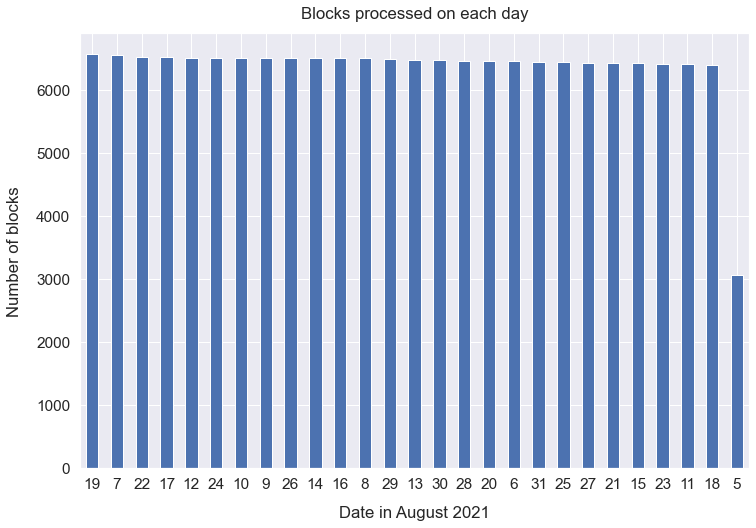

In [318]:
dfc['date'].value_counts().plot(kind='bar')
sns.set(font_scale=1.4)
dfc['date'].value_counts().plot(kind='bar', figsize=(12, 8), rot=0)
plt.xlabel("Date in August 2021", labelpad=14)
plt.ylabel("Number of blocks", labelpad=14)
plt.title("Blocks processed on each day", y=1.02)
plt.show()

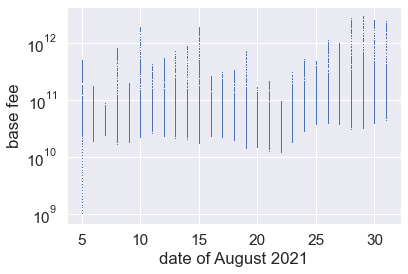

In [319]:
plt.subplot(1, 1, 1)
plt.plot(dfc['date'], df['base_fee_per_gas'], ',')
plt.yscale('log')
plt.xlabel('date of August 2021')
plt.ylabel('base fee')
plt.show()

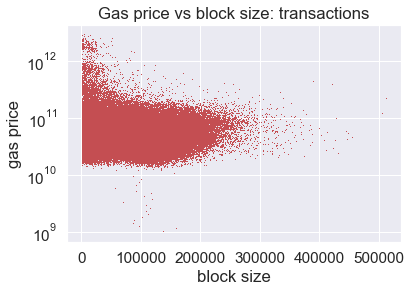

In [320]:
plt.subplot(1, 1, 1)
plt.plot(df0['size'], df0['base_fee_per_gas'], ',r')
plt.yscale('log')
plt.xlabel('block size')
plt.ylabel('gas price')
plt.title('Gas price vs block size: transactions')
plt.show()

### We can see that throughout the month, the base fee remains relatively stable for the blocks, and the size of block also does not noticably affect the base fee

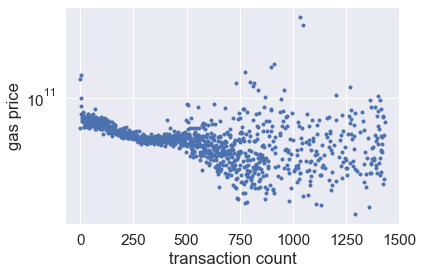

In [321]:
tcountfee = df0.groupby('transaction_count').mean().iloc[:, -1]
plt.plot(tcountfee, '.')
plt.yscale('log')
plt.xlabel('transaction count')
plt.ylabel('gas price')
plt.show()

# Transaction data

In [579]:
dfog = pd.read_csv('txns.csv')
dfog.head()

,number,difficulty,total_difficulty,size,gas_limit,transaction_count,value,gas,gas_price
0,12752822,6425575804636287,27035712654455021497800,78173,15014647,278,0,51024,15000004377
1,12753080,6349705712431105,27037365484501143928573,53730,15000000,195,0,320000,7602835282
2,12756846,6377964208248559,27061073669669323138373,35330,14985353,159,0,21000,4500000000
3,12752761,6451865431002786,27035320354884426319806,57185,15000000,178,0,34500,6500000000
4,12751590,6544163153880016,27027639990350569689858,67487,15000000,293,49479613848192904,50000,20100000000


In [580]:
dfog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1122543 entries, 0 to 1122542
Data columns (total 9 columns):
 #   Column             Non-Null Count    Dtype 
---  ------             --------------    ----- 
 0   number             1122543 non-null  int64 
 1   difficulty         1122543 non-null  int64 
 2   total_difficulty   1122543 non-null  object
 3   size               1122543 non-null  int64 
 4   gas_limit          1122543 non-null  int64 
 5   transaction_count  1122543 non-null  int64 
 6   value              1122543 non-null  object
 7   gas                1122543 non-null  int64 
 8   gas_price          1122543 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 77.1+ MB


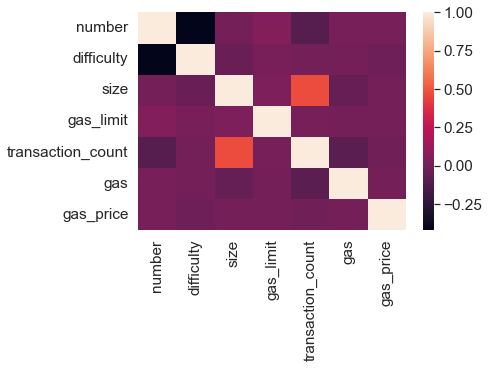

In [583]:
sns.heatmap(dfog.corr())
plt.savefig('corr.png')

In [584]:
dfog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1122543 entries, 0 to 1122542
Data columns (total 9 columns):
 #   Column             Non-Null Count    Dtype 
---  ------             --------------    ----- 
 0   number             1122543 non-null  int64 
 1   difficulty         1122543 non-null  int64 
 2   total_difficulty   1122543 non-null  object
 3   size               1122543 non-null  int64 
 4   gas_limit          1122543 non-null  int64 
 5   transaction_count  1122543 non-null  int64 
 6   value              1122543 non-null  object
 7   gas                1122543 non-null  int64 
 8   gas_price          1122543 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 77.1+ MB


In [585]:
dfog[dfog['gas_price']==0]

,number,difficulty,total_difficulty,size,gas_limit,transaction_count,value,gas,gas_price
284027,12752652,6489378542543366,27034614640584136970293,66202,14992547,148,0,434140,0
284028,12755246,6285318950666627,27050963454587148984062,74635,14985353,260,0,419705,0
284029,12754229,6251811750837248,27044595916426571018154,28028,14985353,60,962524876357721,294852,0
284030,12753093,6343929534939598,27037448098799292621297,69088,15000000,170,0,10000000,0
284031,12752104,6564050543091309,27031015715299709950620,66920,14986443,233,0,390385,0
...,...,...,...,...,...,...,...,...,...
300210,12756557,6321918462930242,27059239788092901047746,78858,15000000,158,0,400000,0
300211,12753490,6292154670974822,27039958134366636681707,45918,14999919,207,0,400000,0
300212,12756101,6403291035832880,27056343042659887578261,50607,14999970,153,0,278794,0
300213,12755592,6293635844569390,27053124359474682166470,52145,15000000,256,0,2000000,0


### Some transactions have their gas prices listed as 0 and 1, we remove these as they are extreme outliers compared to the other values for gas price

In [586]:
df = dfog.copy()

df.drop(df[df['gas_price'] == 0].index, inplace=True)
df.drop(df[df['gas_price'] == 1].index, inplace=True)
df.shape

(1105681, 9)

## Feature engineering

### The gas_prices for the last 5 blocks are used as features for the current block

In [587]:
# creating gas price dictionaries
dfmean = df.groupby('number').mean()
dfmax = df.groupby('number').max()
dfmin = df.groupby('number').min()

meandict = dict(zip(dfmean.index, dfmean['gas_price']))
maxdict = dict(zip(dfmax.index, dfmax['gas_price']))
mindict = dict(zip(dfmin.index, dfmin['gas_price']))

In [588]:
memory = 5
blocknumlist = list(set(sorted(df['number'])))
validnums = blocknumlist[memory:]

In [589]:
def pastavg(idx, vals):
    total = 0
    for i in range(memory):
        total += vals[blocknumlist[idx + i]]
    total /= memory
    return total

In [590]:
from collections import defaultdict

meandict2 = defaultdict(int)
mindict2 = defaultdict(int)
maxdict2 = defaultdict(int)

for i in range(len(validnums)):
    meandict2[validnums[i]] = pastavg(i, meandict)
    mindict2[validnums[i]] = pastavg(i, mindict)
    maxdict2[validnums[i]] = pastavg(i, maxdict)

In [591]:
meancol = np.zeros(len(df))
maxcol = np.zeros(len(df))
mincol = np.zeros(len(df))
targetmin = np.zeros(len(df))

In [592]:
for i, num in enumerate(df['number']):
    meancol[i] = meandict2[num]
    maxcol[i] = maxdict2[num]
    mincol[i] = mindict2[num]
    targetmin[i] = mindict[num]

In [593]:
df['past_min'] = mincol
df['past_mean'] = meancol
df['past_max'] = maxcol
df['block_min'] = targetmin

In [594]:
df.head()

,number,difficulty,total_difficulty,size,gas_limit,transaction_count,value,gas,gas_price,past_min,past_mean,past_max,block_min
0,12752822,6425575804636287,27035712654455021497800,78173,15014647,278,0,51024,15000004377,3.365059e+09,9.980774e+09,5.395000e+10,1.200000e+10
1,12753080,6349705712431105,27037365484501143928573,53730,15000000,195,0,320000,7602835282,7.158000e+09,2.022363e+10,1.060909e+12,6.000000e+09
2,12756846,6377964208248559,27061073669669323138373,35330,14985353,159,0,21000,4500000000,5.440000e+09,9.925386e+09,7.561275e+10,4.000000e+09
3,12752761,6451865431002786,27035320354884426319806,57185,15000000,178,0,34500,6500000000,7.280000e+09,1.437368e+10,1.160908e+11,4.500000e+09
4,12751590,6544163153880016,27027639990350569689858,67487,15000000,293,49479613848192904,50000,20100000000,4.680000e+09,1.442106e+10,1.207825e+11,1.000000e+10


### The entries with 0 past_min, past_mean, and past_max are dropped

In [595]:
df.drop(df[df['past_min'] == 0].index, inplace=True)
df.shape

(1104910, 13)

In [596]:
df2 = df.copy()

### dropping number, total_difficulty, and gas_price column

In [597]:
df2.drop('number', axis=1, inplace=True)
df2.drop('total_difficulty', axis=1, inplace=True)
df2.drop('gas_price', axis=1, inplace=True)
df2.drop('value', axis=1, inplace=True)

In [598]:
df2.head()

,difficulty,size,gas_limit,transaction_count,gas,past_min,past_mean,past_max,block_min
0,6425575804636287,78173,15014647,278,51024,3.365059e+09,9.980774e+09,5.395000e+10,1.200000e+10
1,6349705712431105,53730,15000000,195,320000,7.158000e+09,2.022363e+10,1.060909e+12,6.000000e+09
2,6377964208248559,35330,14985353,159,21000,5.440000e+09,9.925386e+09,7.561275e+10,4.000000e+09
3,6451865431002786,57185,15000000,178,34500,7.280000e+09,1.437368e+10,1.160908e+11,4.500000e+09
4,6544163153880016,67487,15000000,293,50000,4.680000e+09,1.442106e+10,1.207825e+11,1.000000e+10


In [599]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df2[df2.columns[:-1]] = scaler.fit_transform(df2[df2.columns[:-1]])

In [600]:
df2.head()

,difficulty,size,gas_limit,transaction_count,gas,past_min,past_mean,past_max,block_min
0,0.497304,1.525696,1.376636,0.768851,-0.306444,-0.471469,-0.552406,-0.503274,1.200000e+10
1,-0.175685,-0.151892,0.634122,-0.146996,0.373021,0.021040,0.091190,0.868203,6.000000e+09
2,0.074976,-1.414733,-0.108392,-0.544231,-0.382288,-0.202041,-0.555886,-0.473770,4.000000e+09
3,0.730501,0.085234,0.634122,-0.334579,-0.348186,0.036881,-0.276384,-0.418639,4.500000e+09
4,1.549208,0.792288,0.634122,0.934365,-0.309031,-0.300726,-0.273407,-0.412249,1.000000e+10


In [601]:
df2.to_csv('processed.csv')

In [624]:
from sklearn.model_selection import train_test_split
x = df2.drop(['block_min'], axis=1)
y = df2['block_min']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [627]:
x.head()

,difficulty,size,gas_limit,transaction_count,gas,past_min,past_mean,past_max
0,0.497304,1.525696,1.376636,0.768851,-0.306444,-0.471469,-0.552406,-0.503274
1,-0.175685,-0.151892,0.634122,-0.146996,0.373021,0.021040,0.091190,0.868203
2,0.074976,-1.414733,-0.108392,-0.544231,-0.382288,-0.202041,-0.555886,-0.473770
3,0.730501,0.085234,0.634122,-0.334579,-0.348186,0.036881,-0.276384,-0.418639
4,1.549208,0.792288,0.634122,0.934365,-0.309031,-0.300726,-0.273407,-0.412249


In [608]:
ytr2 = scaler.fit_transform([y_train])
ytr2 = ytr2[0]
np.unique(y_train, return_counts=True)

(array([9.40000000e+01, 4.05000000e+02, 6.87749500e+06, 2.52717870e+07,
        2.52720970e+07, 2.52721390e+07, 2.52721940e+07, 2.52723400e+07,
        2.52726780e+07, 2.52728000e+07, 2.52735220e+07, 2.52744680e+07,
        2.52748850e+07, 2.52753590e+07, 2.52755910e+07, 2.52758350e+07,
        2.52760840e+07, 2.52762490e+07, 2.52774930e+07, 2.52777520e+07,
        2.52777950e+07, 2.52779510e+07, 2.52779950e+07, 2.52780390e+07,
        2.52783850e+07, 2.52786340e+07, 2.52791280e+07, 2.52794610e+07,
        2.52796420e+07, 2.52796700e+07, 2.52801230e+07, 2.52803030e+07,
        2.52811140e+07, 2.52817350e+07, 2.52818010e+07, 2.52818410e+07,
        2.52819290e+07, 2.52821280e+07, 2.52827310e+07, 2.52835260e+07,
        2.52836830e+07, 2.52842760e+07, 2.52845780e+07, 2.52848110e+07,
        2.52850850e+07, 2.52854540e+07, 2.52856440e+07, 2.52863720e+07,
        2.52864390e+07, 2.52864530e+07, 2.52866680e+07, 2.52868000e+07,
        2.52868500e+07, 2.52870040e+07, 2.52872890e+07, 2.528736

In [610]:
xgb_r = xg.XGBRegressor(objective ='reg:squarederror', n_estimators = 25)
xgb_r.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=25, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [611]:
x_train

,difficulty,size,gas_limit,transaction_count,gas,past_min,past_mean,past_max
256655,-0.691886,-1.162234,0.634122,-0.610437,-0.382288,0.260221,0.173308,0.283780
270488,0.245827,-0.376184,0.633412,-0.202168,-0.109147,0.065902,-0.208509,0.105816
488921,0.006970,-0.125949,-0.108392,0.625405,0.087893,0.001182,-0.088445,-0.274048
645539,0.313731,2.806931,-0.113766,-0.014585,-0.002368,-0.363053,-0.360972,-0.275345
273518,0.353296,-0.478034,0.995620,-0.301476,-0.382288,-0.248130,-0.402386,-0.477787
...,...,...,...,...,...,...,...,...
1015925,-0.455408,-1.912869,1.746854,-1.261461,-0.382288,-0.285144,-0.199022,0.295595
526630,0.212177,-0.332602,0.632703,0.161964,0.087893,0.101806,-0.312025,-0.430088
918866,0.802202,-0.535205,0.259747,0.195067,1.382812,0.042075,-0.111431,-0.325013
185391,-0.612274,0.761403,-0.130951,0.128861,-0.382288,-0.051416,-0.215223,-0.463163


In [612]:
pred = xgb_r.predict(x_test)

In [613]:
v = ((y_test - y_test.mean())**2).sum()
u = ((y_test - pred)**2).sum()
1-u/v

0.8226299164966597

In [614]:
y_test.mean()

6712607546.947413

In [615]:
((y_test - pred)**2).mean()

1.0615624320398135e+19

In [616]:
pred

array([5.5593446e+09, 8.7479429e+09, 6.5653878e+09, ..., 7.7662295e+09,
       1.1568461e+10, 1.4384719e+10], dtype=float32)

In [617]:
y_test

353362    2.532687e+07
235043    8.085000e+09
550137    4.000000e+09
475123    1.500000e+10
665773    1.100000e+10
              ...     
905535    1.000000e+09
252174    4.400001e+09
940588    2.534606e+07
213822    1.300000e+10
830812    1.800000e+10
Name: block_min, Length: 331473, dtype: float64

In [618]:
y_test - y_test.mean()

353362   -6.687281e+09
235043    1.372392e+09
550137   -2.712608e+09
475123    8.287392e+09
665773    4.287392e+09
              ...     
905535   -5.712608e+09
252174   -2.312606e+09
940588   -6.687261e+09
213822    6.287392e+09
830812    1.128739e+10
Name: block_min, Length: 331473, dtype: float64

In [619]:
y_test - pred

353362   -5.534018e+09
235043   -6.629429e+08
550137   -2.565388e+09
475123    1.857241e+09
665773   -2.142019e+08
              ...     
905535   -4.586980e+09
252174   -1.993551e+09
940588   -7.740883e+09
213822    1.431539e+09
830812    3.615281e+09
Name: block_min, Length: 331473, dtype: float64

In [620]:
from sklearn.metrics import r2_score
r2_score(y_test, pred)

0.8226299164966597

In [621]:
def accuracy(y_pred,data):
    correct=0
    i=0
    for index,row in data.iterrows():
        if(y_pred[i]>=row['block_min'] and y_pred[i]<=row['block_min']+100000000):
            correct+=1
        i+=1
    print(correct)
    print("Accuracy",correct/data.shape[0]);

In [622]:
331297/len(test2)

0.9994690366937881

In [623]:
accuracy(pred, test2)

6131
Accuracy 0.018496227445372625
